# Description
## Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

## Objective

Explore and visualize the dataset.
Build a linear regression model to predict the prices of used cars.
Generate a set of insights and recommendations that will help the business.
Data Dictionary 

- S.No. : Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter('ignore')
from pandas import set_option
import copy as cp

In [2]:
#Importing the Datasets
df = pd.read_csv("used_cars_data.csv")

# Performing EDA - Exploratory Data Analysis

## Identify number of shape and datatype of dataset

In [3]:
#Identify the number of features in the Datasets
print("Rows and Columns :",df.shape)

Rows and Columns : (7253, 14)


In [4]:
#Identify the features in the Datasets
print("Features in Dataset",df.columns)

Features in Dataset Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [5]:
#Identify the data types of features provided in Dataset
print("Data types in Dataset",df.dtypes)

Data types in Dataset S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object


## Sample 10 records of dataset

In [6]:
# Check sample data
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


- Mileage is having km/kg and kmpl - Need to convert into common base (like kmpl)
- New_price having Crore and Lakh - Need to convert into common base (like all values to Lakhs)
- For Engine "CC" and Power "bhp" is attached with number
- One hot encoding can be performed on a few fields like year, location,transmission,etc

## Check for missing data

In [7]:
#Identify empty/null cells or Nans
print("\n\nMissing values : ", df.isnull().sum())



Missing values :  S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64


- There are missing values in many columns

In [8]:
# Set values for 2 decimal places
set_option('precision',2) 

## Check for duplicate values

In [9]:
# Check duplicate values in dataset
df.duplicated().sum()

0

## Basic stats of dataset

In [10]:
# Descibe the dataset for basic stats
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7.3e+03,NaN,NaN,NaN,3.6e+03,2.1e+03,0,1.8e+03,3.6e+03,5.4e+03,7.3e+03
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7.3e+03,NaN,NaN,NaN,2e+03,3.3,2e+03,2e+03,2e+03,2e+03,2e+03
Kilometers_Driven,7.3e+03,NaN,NaN,NaN,5.9e+04,8.4e+04,1.7e+02,3.4e+04,5.3e+04,7.3e+04,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Top location is Mumbai 
- Fuel type highly consumed is Diesel
- Number of seats varies from 0 to 10

## Data Conversion Process

- Convert km/kg to kmpl
- Convert Crores to Lakhs
- Convert engine , power to numeric value

### Convert km/kg to kmpl

In [11]:
# 1st - Find out records with km/kg and kmpl
kmkg = 0
kmpl = 0
others = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
    else:
        #print("Others : ",str(i))
        others+=1

print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))
print('The number of rows with NAN : {} '.format(others))

The number of rows with Km/Kg : 74 
The number of rows with Kmpl : 7177 
The number of rows with NAN : 2 


In [12]:
# Convert all values of km/kg to kmpl
Correct_Mileage= []
for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*0.74
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))

In [13]:
## Filter out 2 NaN records
df= df[df['Mileage'].notnull()]

In [14]:
## Merge the new dataset
df['Mileage'] = Correct_Mileage

### Convert Crores to Lakh

In [15]:
# Find out records with Crores and Lakhs
cr = 0
lak = 0
others = 0
for i in df.New_Price:
    if str(i).endswith("Cr"):
        cr+=1
    elif str(i).endswith("Lakh"):
        lak+=1
    else:
        #print("Others : ",str(i))
        others+=1

print('The number of rows with Crores : {} '.format(cr))
print('The number of rows with Lakhs : {} '.format(lak))
print('The number of rows with NAN : {} '.format(others))

The number of rows with Crores : 20 
The number of rows with Lakhs : 985 
The number of rows with NAN : 6246 


In [16]:
# Convert columns having value in crores to Lakhs
def func_convertToLacs(x):
    if(str(x).find('Cr')!=-1):
        returnvalue = float(str(x)[:-3])*100
        returnvalue = str(round(returnvalue,2))
        return returnvalue
    else: return x

In [17]:
# Change NaN to 0 and then apply above function
df['New_Price'].replace(np.NaN, 0.0, inplace= True)
df['New_Price'] = df['New_Price'].apply(func_convertToLacs)
df['New_Price'].replace(0.0, np.NaN, inplace= True)

### Adjust the Datatypes of the dataset

In [18]:
#Adjusting the datatype
df['Power'].replace('bhp','')
df['Engine'].replace('CC','')
#df['Mileage']=pd.to_numeric(df['Mileage'].astype(str).str[:-5], errors='coerce')
df['Power']=pd.to_numeric(df['Power'].astype(str).str[:-4], errors='coerce')

df['New_Price']=pd.to_numeric(df['New_Price'].astype(str).str[:-5], errors='coerce')
df['Year']=df['Year'].astype(object) 
df['Engine']=pd.to_numeric(df['Engine'].astype(str).str[:-2], errors='coerce')
df['Power']=pd.to_numeric(df['Power'].astype(str).str[:-2], errors='coerce')



In [19]:
## Check if the transformations are applied correctly
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.68,998.0,58.0,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.0,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.0,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.0,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.0,5.0,NaN,17.74


### Extract Brand name from Name

In [20]:
brand = []
for row, sentence in enumerate(df['Name']):
    if sentence.split(' ')[0] == 'Land':
        brand.append(' '.join(sentence.split(' ')[0:2]))
    elif sentence.split(' ')[0] == 'OpelCorsa':
        brand.append('Opel')
    elif sentence.split(' ')[0] == 'ISUZU':
        brand.append('Isuzu')
    else:
        brand.append(sentence.split(' ')[0])
df['brand'] = brand
del brand

In [21]:
# Descibe the dataset for basic stats
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7.3e+03,NaN,NaN,NaN,3.6e+03,2.1e+03,0,1.8e+03,3.6e+03,5.4e+03,7.3e+03
Name,7251,2039,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7251,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7.3e+03,23,2e+03,9.3e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,7.3e+03,NaN,NaN,NaN,5.9e+04,8.4e+04,1.7e+02,3.4e+04,5.3e+04,7.3e+04,6.5e+06
Fuel_Type,7251,4,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7251,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7251,4,First,5950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7.3e+03,NaN,NaN,NaN,18,4.5,0,15,18,21,28
Engine,7.2e+03,NaN,NaN,NaN,1.6e+03,6e+02,6.2e+02,1.2e+03,1.5e+03,2e+03,6e+03


- Data is missing : Mileage , Engine , Power , Seats, New_price and Price 

# Data Visualization : Before Pre-data processing

## Continuous Data : Univariate Analysis

In [22]:
sns.set(rc={'figure.figsize':(10,8.27)})

In [23]:
# Select columns for continous values in separate dataframe for analysis
data_continous = df[['Kilometers_Driven','Mileage','Engine','Power','New_Price','Price','Seats']]

### Histogram for all variables having continous data

array([[<AxesSubplot:title={'center':'Engine'}>,
        <AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'New_Price'}>,
        <AxesSubplot:title={'center':'Power'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Seats'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

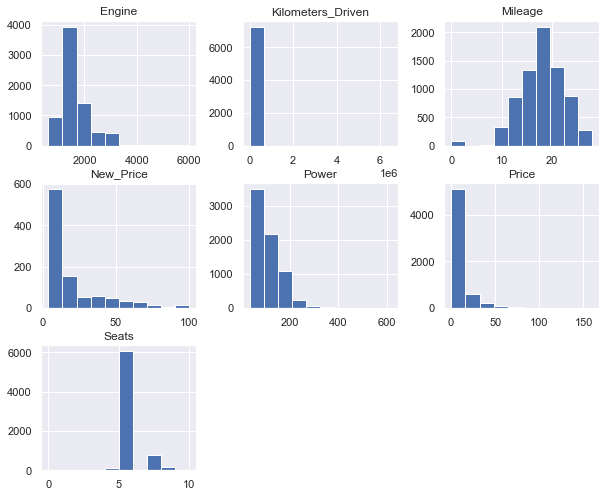

In [24]:
# Histograms to check distribution of variables

data_continous.hist()

#### Analysis on Histogram
- Engine is more concenrated between 1000 to 2000
- Power is distrubted where its ranging from 5 to 30. More concentration between 15-20
- Lot of Null values in new price
- Seats are mostly concerated with 5

### Displot for all continous variables

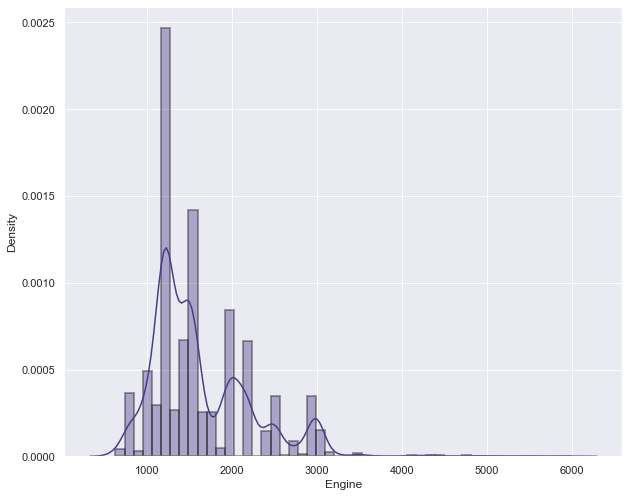

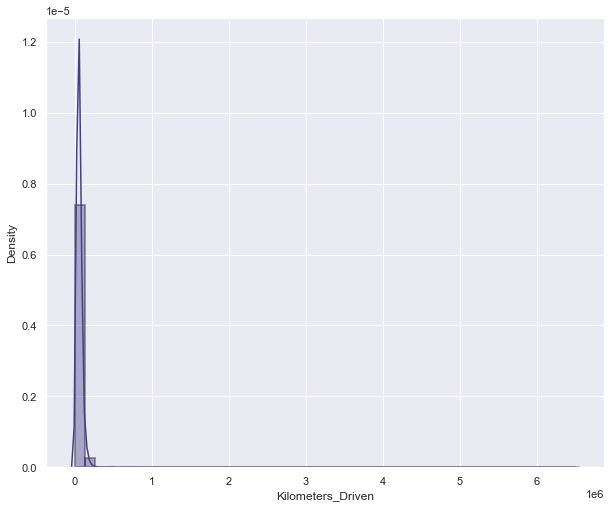

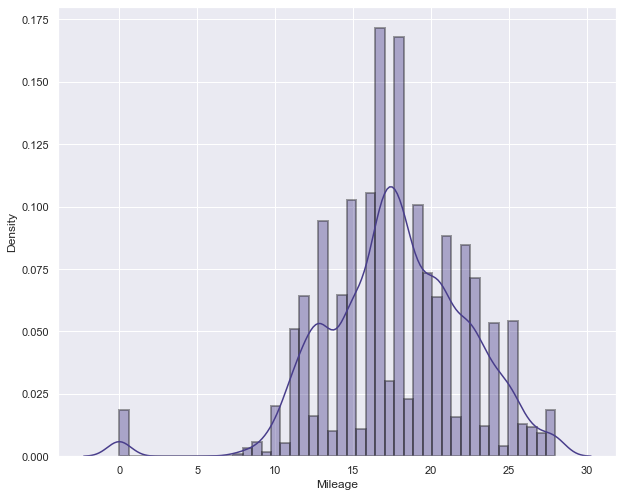

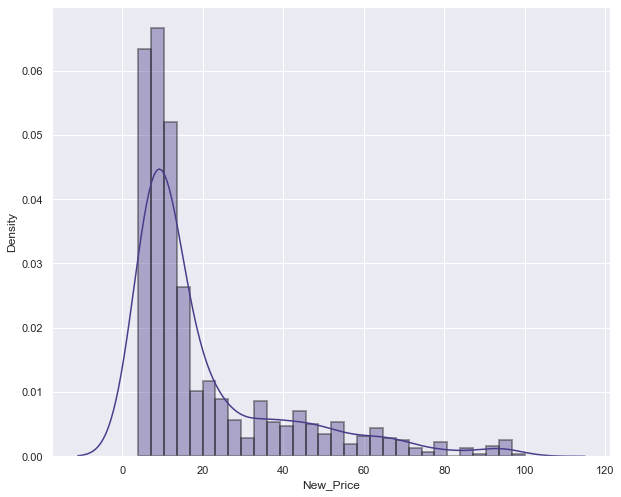

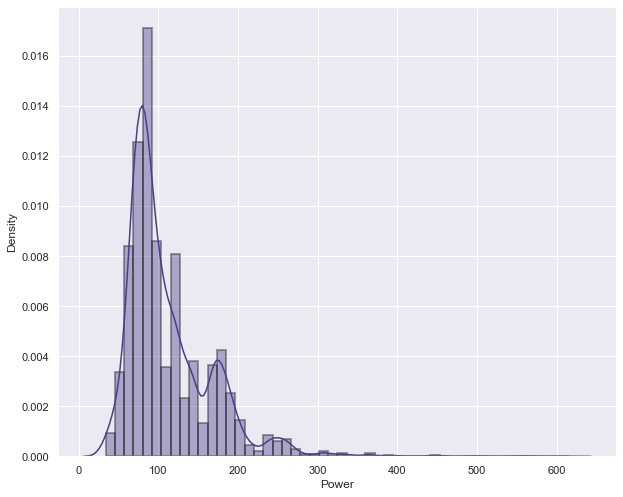

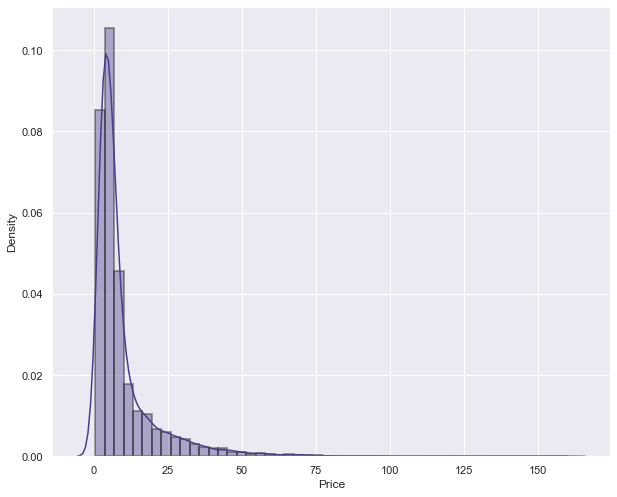

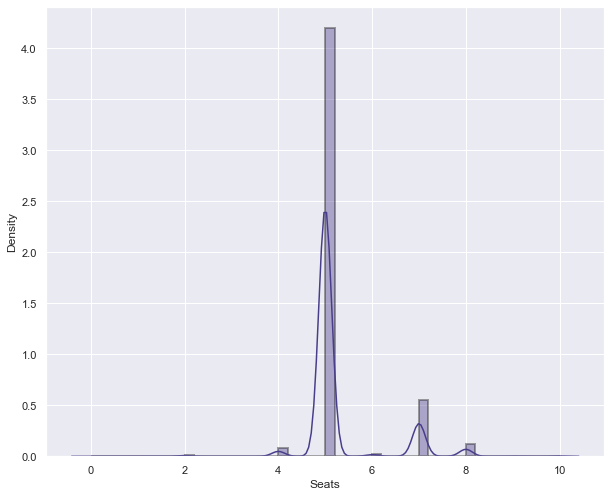

In [25]:
# Analysis on Dis plot for all continous variables in the dataset

sns.distplot(data_continous["Engine"],color = "darkslateblue",hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()
sns.distplot(data_continous["Kilometers_Driven"],color = "darkslateblue",hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()
sns.distplot(data_continous["Mileage"],color = "darkslateblue",hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()
sns.distplot(data_continous["New_Price"],color = "darkslateblue",hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()
sns.distplot(data_continous["Power"],color = "darkslateblue",hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()
sns.distplot(data_continous["Price"],color = "darkslateblue",hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()
sns.distplot(data_continous["Seats"],color = "darkslateblue",hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()

#### Analysis on Displot
- New price and Power seems to be right skewed
- Mileage is more concentrated in 10 to 25

### Continuous plot for all variables having continous data

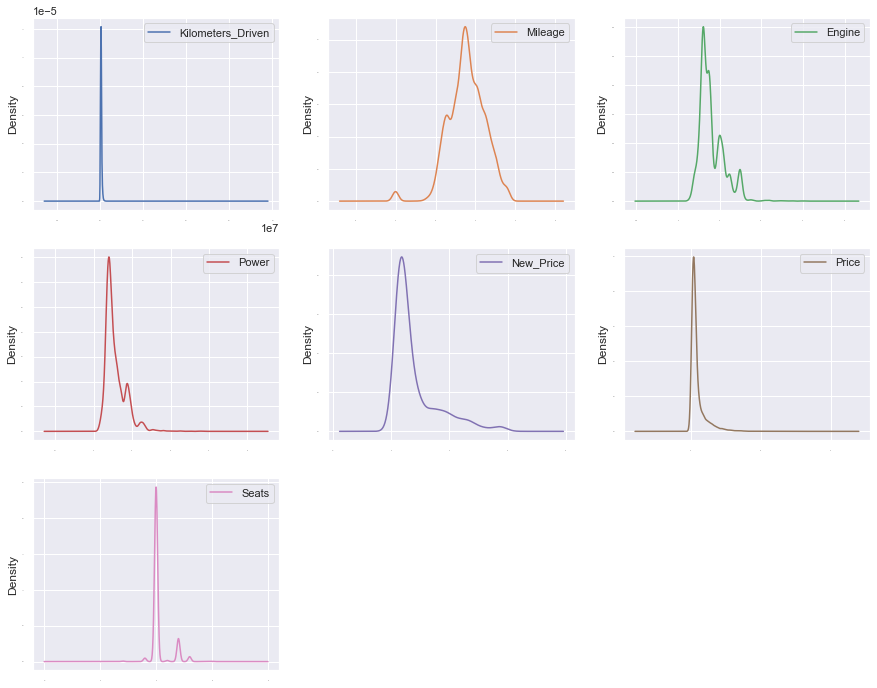

In [26]:
data_continous.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

#### Analysis on continuous variables
- Kilometers driven , Power , Engine , New_price and seats have outliers

### Box plot for all variables having continous data

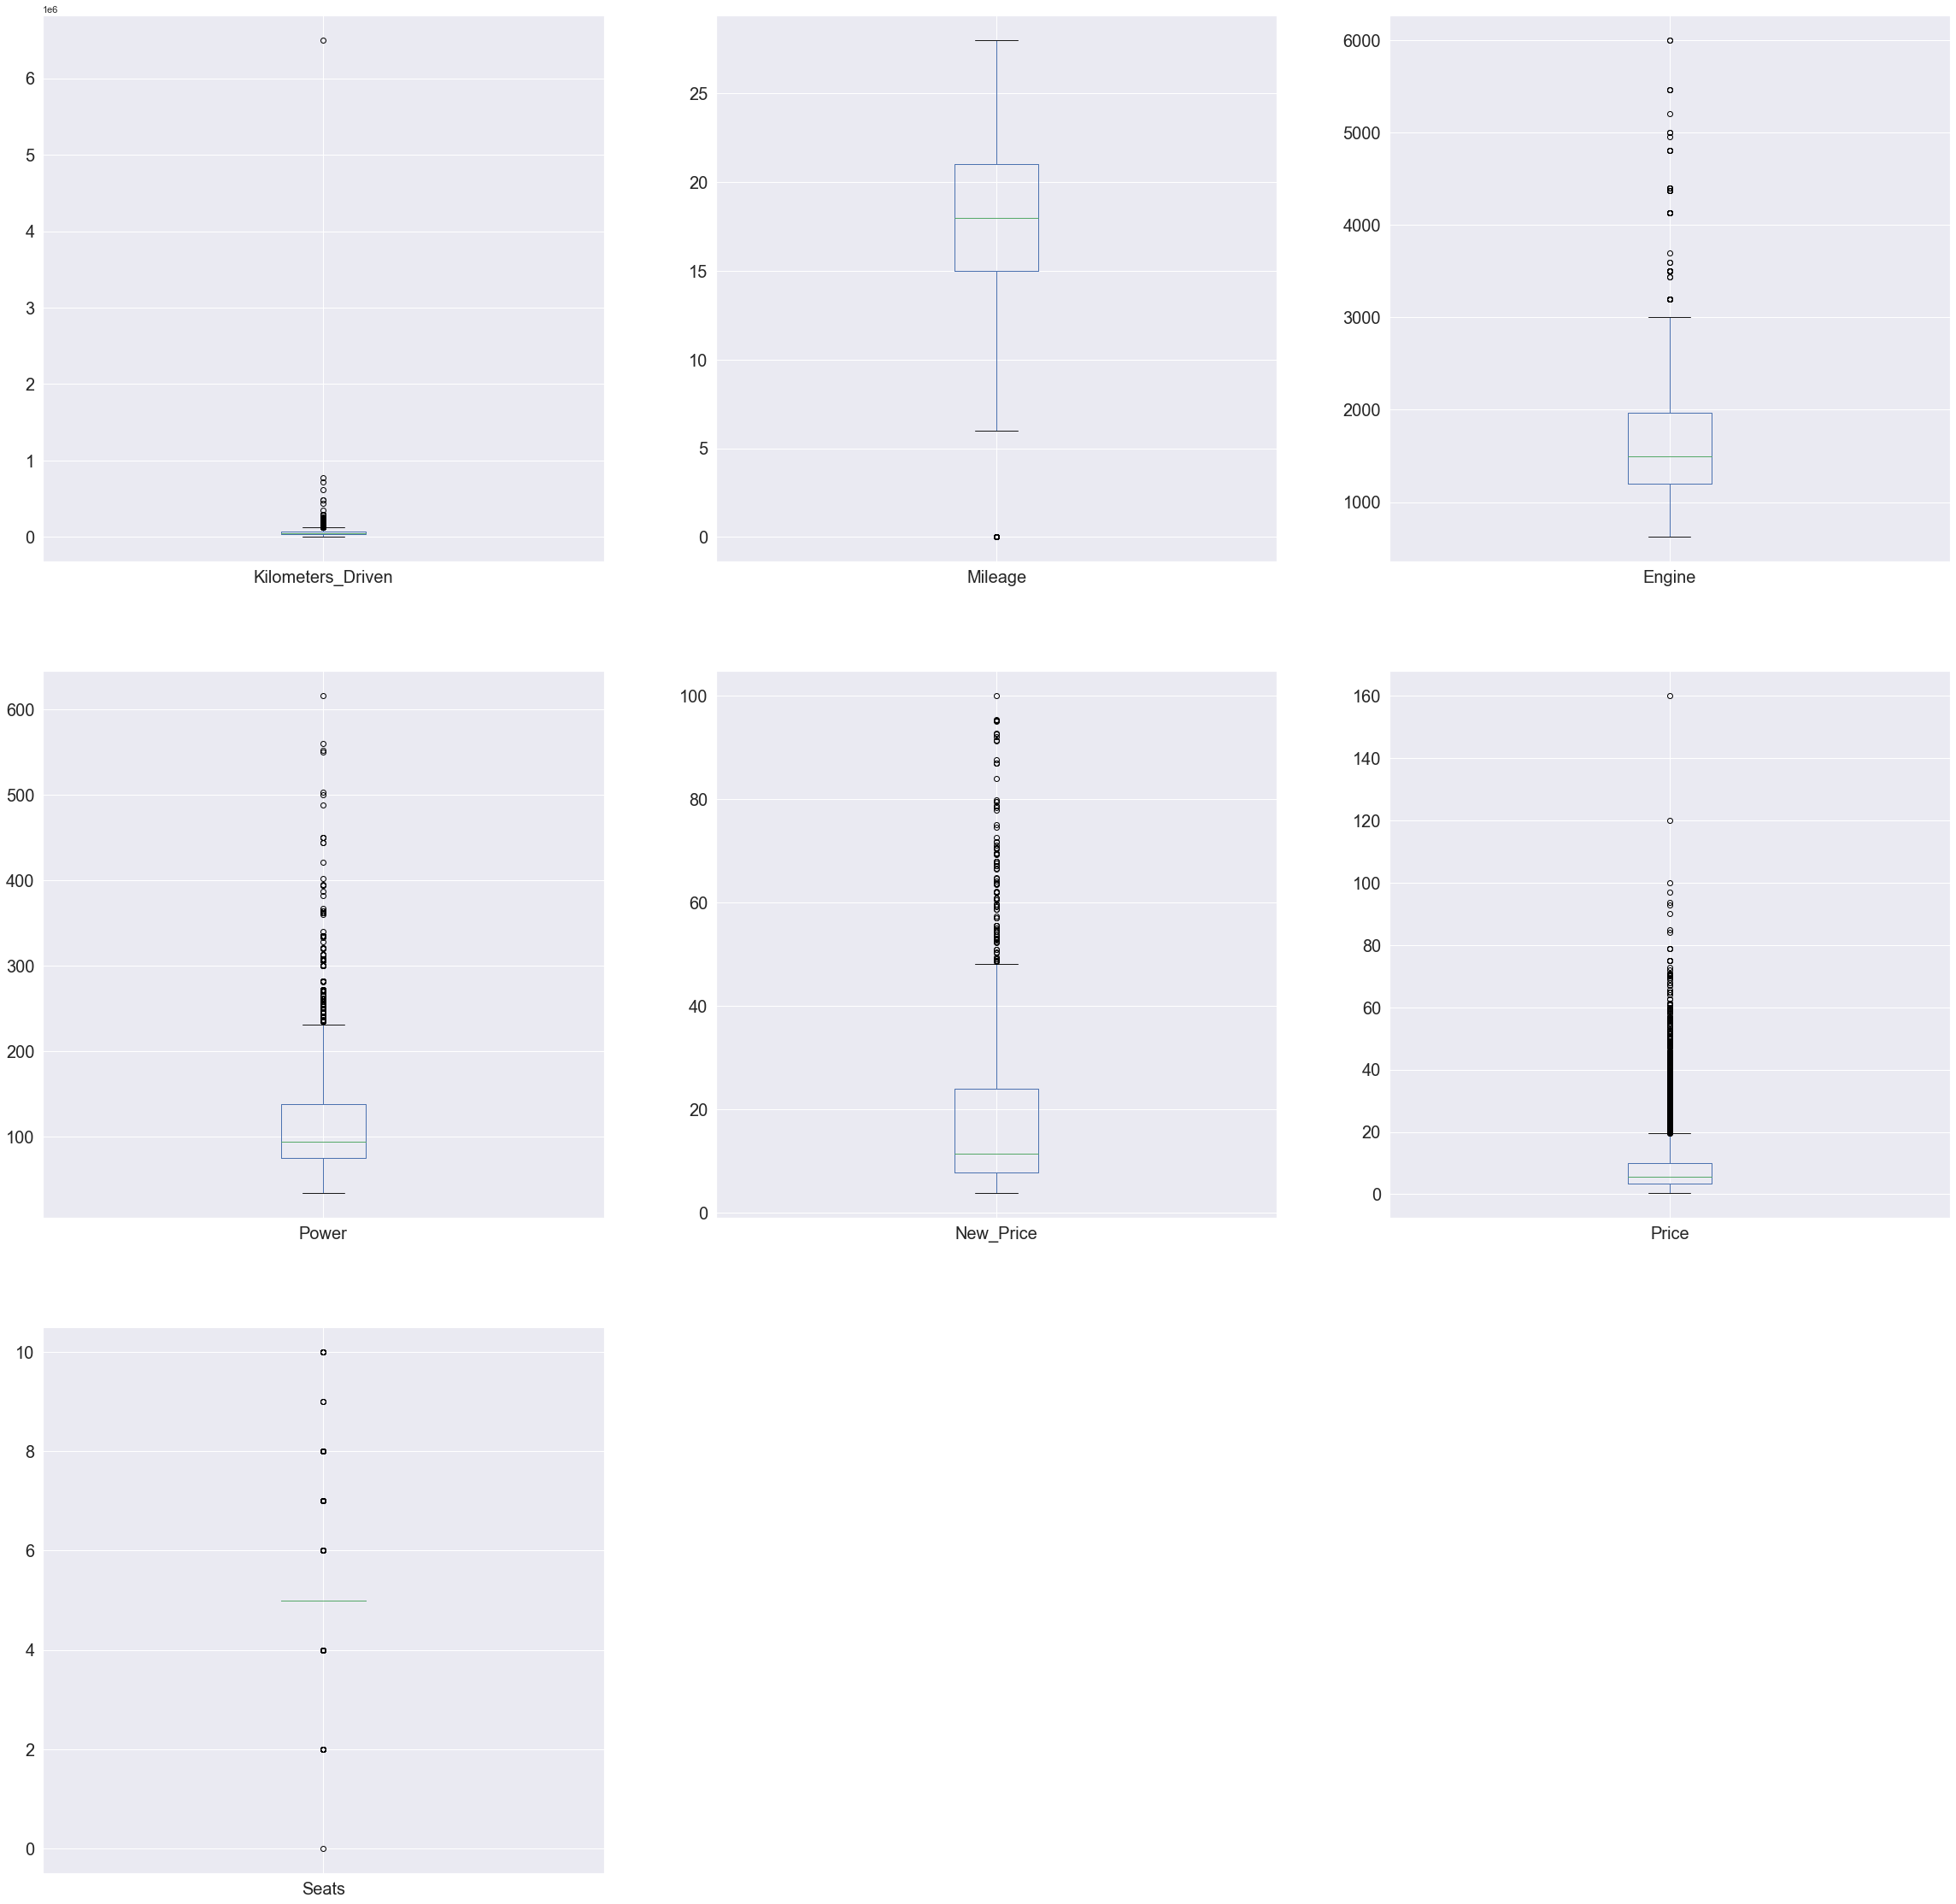

In [27]:
data_continous.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,
fontsize=20, figsize = (40, 40))
plt.show()

#### Analysis on Boxplot

- The data visvualization indicates there are many outliers in Kilometers_Driven, Mileage, Engine, Power and New Price

## Continuous Data : Bi-variate Analysis

### Box plot for Year and Location

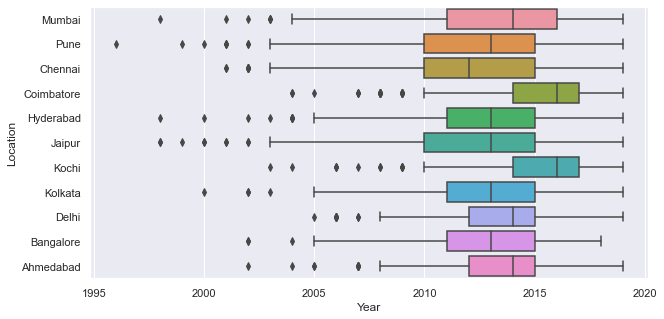

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Year", y="Location", data=df);

#### Analysis
- Most of the cars were driven in various location between 2010 and 2020
- There are few outliers which exist in various locations

### Pairplot for all variables having continous data

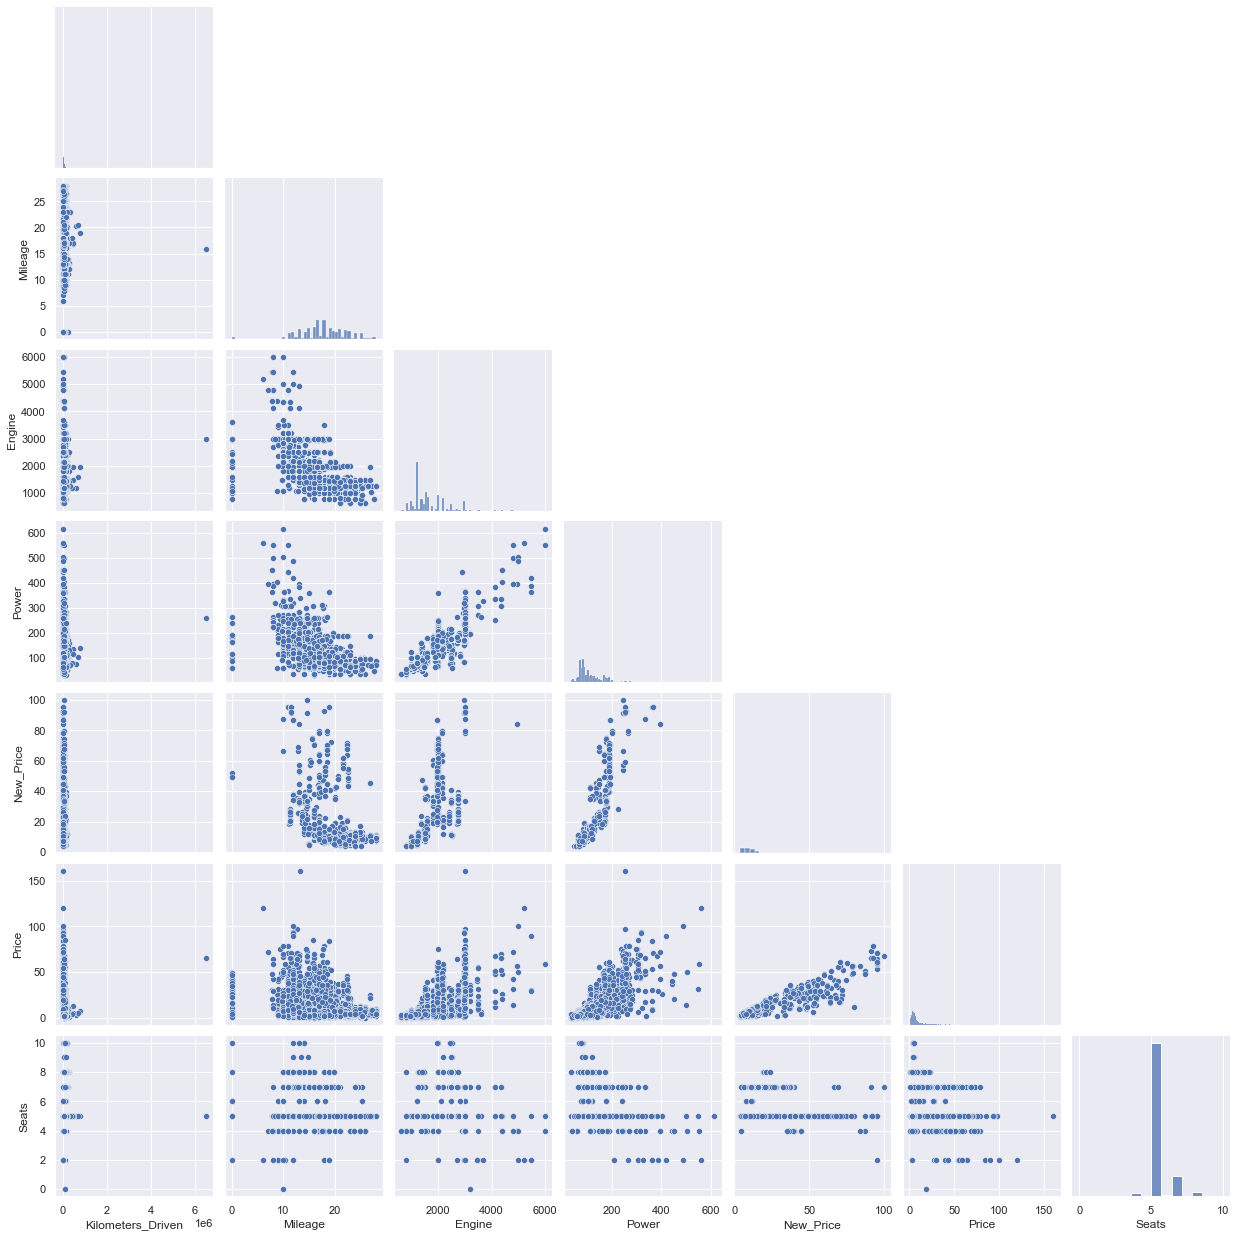

In [29]:
# Scatter plot matrix (Pairplot for all variables)
sns.pairplot(data_continous,corner=True)
plt.show()

### Heatmap for features having continous data

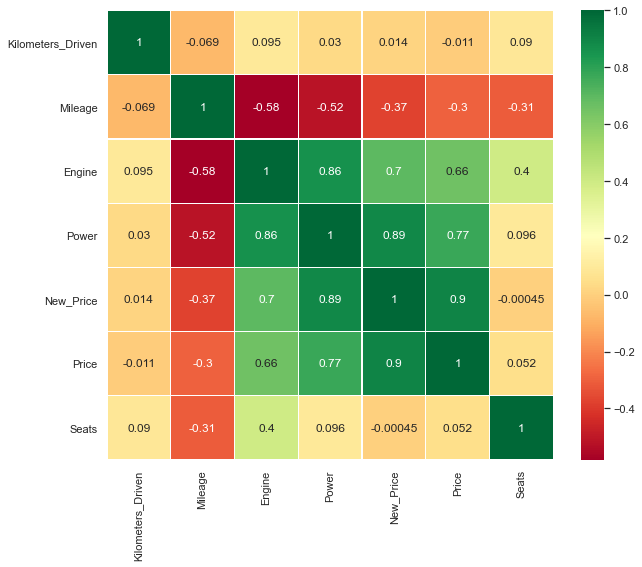

In [30]:
#Heat map of all continuous variables, ignored the categorical variables
#data_continous_temp = data_continous.copy()
#data_continous_temp['Price'] = new_df.Price
sns.heatmap(data_continous.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
plt.show()

### Analysis on Pairplot and Heat map

- We can visulaize outliers in Kilometers_Driven, Mileage, Engine, Power and New Price
- Power-New_Price , Power-Engine , New_Price-Engine are highly co-related

## Categorical Data : Univariate Analysis

In [31]:
# Select columns for categorical values in separate dataframe for analysis
data_categorical = df[['brand','Location','Year','Fuel_Type','Transmission','Owner_Type']]

In [32]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Box plot on Year

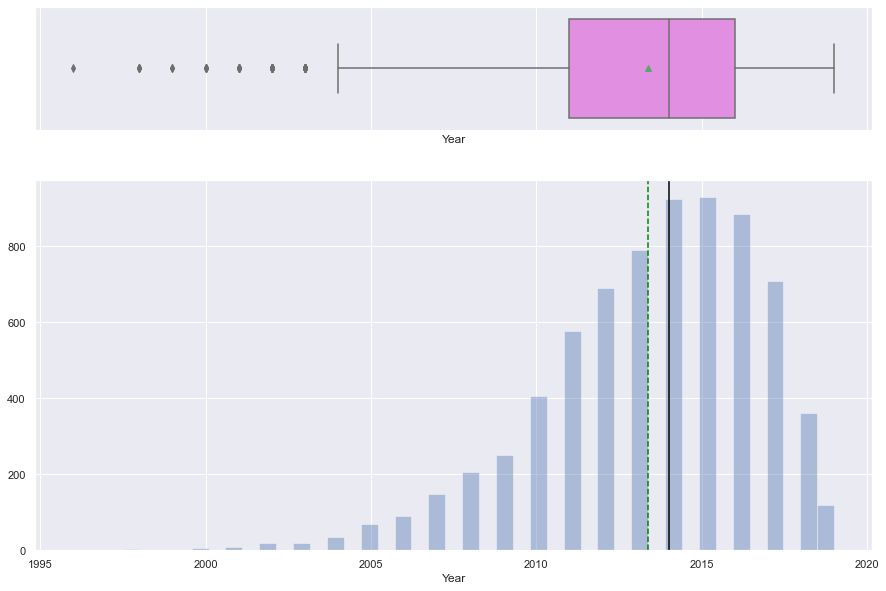

In [33]:
histogram_boxplot(df["Year"])

#### Analysis on box plot for year
- Seems a few outliers in dataset
- Data more concenttrated between 2015-2020

## Categorical Data : Bivariate Analysis

### Bar Plot owner type (categorical data) and kilometer driven (continous data)

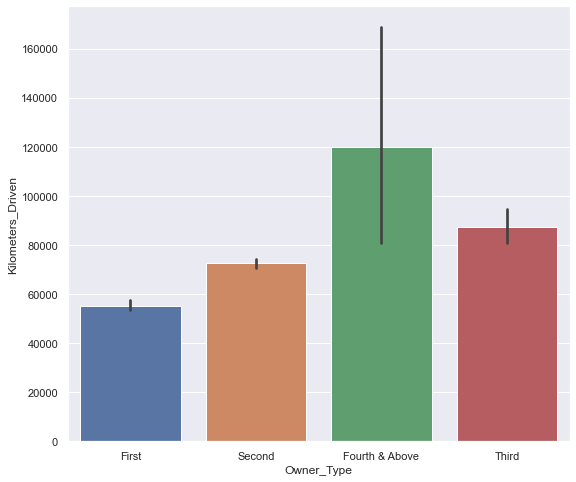

In [34]:
plt.figure(figsize=(9,8))
sns.barplot(x='Owner_Type',y='Kilometers_Driven',data=df)
plt.show()

#### Analysis on Bar plot
- Owner_type (Fourth & Above) have more kilometer driven

### Bar Plot Location (categorical data) and kilometer driven (continous data)

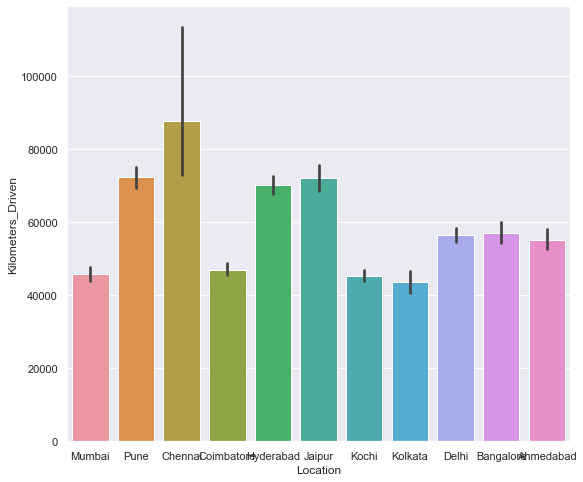

In [35]:
plt.figure(figsize=(9,8))
sns.barplot(x='Location',y='Kilometers_Driven',data=df)
plt.show()

#### Analysis on location & kilometer_driven
- Chennai seems to be largest , followed by Pune/Jaipur and then Hyderbad
- Kolkata seems to be lowest of all location

### Cross Tab analysis (Fuel_type vs Location) and (Brand vs Location)

In [36]:
pd.crosstab(df['Fuel_Type'],df['Location'] , margins=True, margins_name="Total")

Location,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Total
Fuel_Type,,,,,,,,,,,,
CNG,3,1,2,0,12,3,0,9,1,18,13,62
Diesel,169,273,341,430,361,593,276,358,316,371,364,3852
LPG,0,0,0,0,0,6,4,0,0,1,1,12
Petrol,103,166,247,342,287,274,219,405,337,558,387,3325
Total,275,440,590,772,660,876,499,772,654,948,765,7251


#### Analysis on Cross-tab (fuel type & location)
- Diesel is used mostly across all location as compared to other fuels
- Most consumption of diesel is Hyderabad
- Most consumption of petrol is Mumbai
- Major consumption of CNG are Delhi, Mumbai and Pune
- Electric cars and LPG is significantly less

In [37]:
pd.crosstab(df['brand'],df['Location'] , margins=True, margins_name="Total")

Location,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Total
brand,,,,,,,,,,,,
Ambassador,0,0,1,0,0,0,0,0,0,0,0,1
Audi,13,40,11,56,31,38,7,33,17,30,9,285
BMW,18,30,29,41,24,37,7,33,14,53,26,312
Bentley,0,1,0,0,0,1,0,0,0,0,0,2
Chevrolet,3,9,17,16,3,12,12,18,19,16,26,151
Datsun,0,2,2,1,0,1,1,2,4,2,2,17
Fiat,0,0,2,4,1,2,6,3,8,5,7,38
Force,0,0,1,0,0,0,0,0,2,0,0,3
Ford,6,19,55,36,20,61,23,34,28,42,27,351


#### Analysis on Cross-tab (Location & Brand)
- Maruti is high seller followed by Hyundai and then toyota
- Ambassador , Smart , Opel, Lamborghini, Hindustan, Ambassador,Bentley,Force are very less owned across all locations

### Delete records where brands are below 5

In [38]:
df = df[~df.brand.isin(['Ambassador' , 'Smart' , 'Opel', 'Lamborghini', 'Hindustan', 'Ambassador','Bentley','Force','Isuzu'])]

- This will remove a few records whose brands and location 

 # Data Preprocessing

## Missing Value Treatment (Imputing Missing Values)

In [39]:
# Glance the dataset before missing value treatment
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.68,998.0,58.0,5.0,NaN,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.0,5.0,NaN,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.0,5.0,8.61,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.0,7.0,NaN,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.0,5.0,NaN,17.74,Audi
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,15.61,814.0,55.0,5.0,NaN,2.35,Hyundai
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.00,1461.0,63.0,5.0,NaN,3.50,Nissan
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.30,2755.0,171.0,8.0,21.00,17.50,Toyota
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.50,1598.0,103.0,5.0,NaN,5.20,Volkswagen
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.00,1248.0,74.0,5.0,NaN,1.95,Tata


In [40]:
# Mark Missing Values
df['Mileage'].replace(0.00, np.nan, inplace= True) #As Milage can't be 0.00
df['Seats'].replace(0.00, np.nan, inplace= True) #As Seats can't be 0.00

In [41]:
#No of null values for each feature
print(df.isnull().sum())
df.head()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                80
Engine                 46
Power                 173
Seats                  54
New_Price            6252
Price                1229
brand                   0
dtype: int64


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.68,998.0,58.0,5.0,NaN,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.0,5.0,NaN,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.0,5.0,8.61,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.0,7.0,NaN,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.0,5.0,NaN,17.74,Audi


In [42]:
# Copy the original datafame into a new dataframe (say refine_data)
refine_data = df.copy()

## Replace missing values

In [43]:
# Replace mileage , engine , power, seats missing values with median

refine_data['Mileage']=refine_data['Mileage'].fillna(refine_data['Mileage'].median())
refine_data['Engine']=refine_data['Engine'].fillna(refine_data['Engine'].median())
refine_data['Power']=refine_data['Power'].fillna(refine_data['Power'].median())
refine_data['Seats']=refine_data['Seats'].fillna(refine_data['Seats'].median())


refine_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.68,998.0,58.0,5.0,NaN,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.0,5.0,NaN,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.0,5.0,8.61,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.0,7.0,NaN,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.0,5.0,NaN,17.74,Audi


In [44]:
# Check for Nulls in all features
print(refine_data.isnull().sum())

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6252
Price                1229
brand                   0
dtype: int64


In [45]:
#Covert Seats and Engine feature to int
refine_data['Seats']=refine_data['Seats'].astype(int)
refine_data['Engine']=refine_data['Engine'].astype(int)
refine_data['Power']=refine_data['Power'].astype(int)
refine_data['Mileage']=refine_data['Mileage'].astype(int)

## Pre-Outlier & Detection Process

In [46]:
# Create a separate dataframe for outlier detection
refine_data_continous = refine_data[['Kilometers_Driven','Mileage','Engine','Power']]

### Pre-Outlier process : Density plot

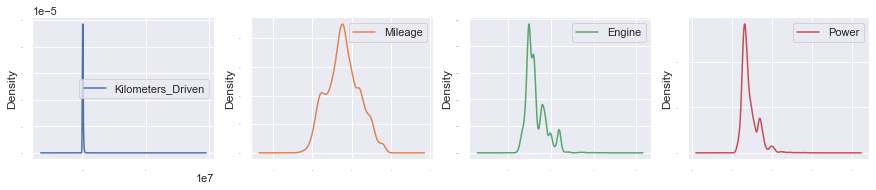

In [47]:
# Density Plot Pre outlier removal
refine_data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

### Pre-Outlier process : Box_Plot

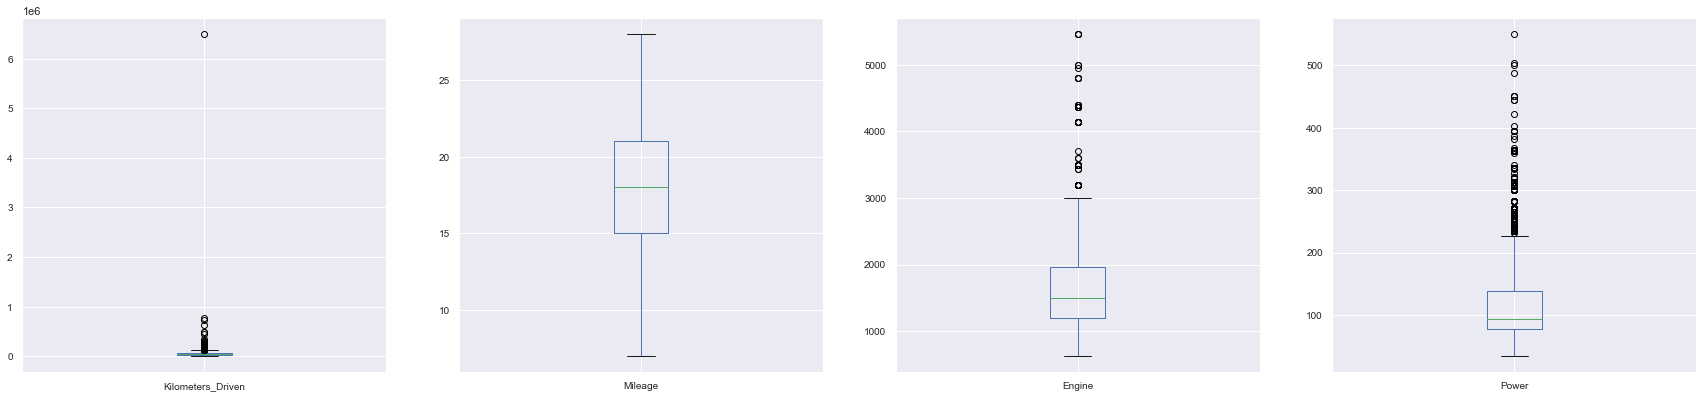

In [48]:
#Box_Plot for checking the outliers

refine_data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

### Pre-Outlier process : Analysis from Density & Box plot 
- Outlier exists in 'Kilometers_Driven','Mileage','Engine','Power'

## Outlier Treatment/Removal

In [49]:
#Remove Outliers from  'Kilometers_Driven','Power','Engine','Mileage'

Q1 = refine_data_continous.quantile(0.25)
Q2 = refine_data_continous.quantile(0.5)
Q3 = refine_data_continous.quantile(0.75)

IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

print("IQR : ",IQR,"\n")
print("Min : ",Min,"\n")
print("Q1 : ",Q1,"\n")
print("Q2 : ",Q2,"\n")
print("Q3 : ",Q3,"\n")
print("Max : ",Max,"\n")


IQR :  Kilometers_Driven    39000.0
Mileage                  6.0
Engine                 770.0
Power                   61.0
dtype: float64 

Min :  Kilometers_Driven   -24500.0
Mileage                  6.0
Engine                  43.0
Power                  -14.5
dtype: float64 

Q1 :  Kilometers_Driven    34000.0
Mileage                 15.0
Engine                1198.0
Power                   77.0
Name: 0.25, dtype: float64 

Q2 :  Kilometers_Driven    53500.0
Mileage                 18.0
Engine                1493.0
Power                   94.0
Name: 0.5, dtype: float64 

Q3 :  Kilometers_Driven    73000.0
Mileage                 21.0
Engine                1968.0
Power                  138.0
Name: 0.75, dtype: float64 

Max :  Kilometers_Driven    131500.0
Mileage                  30.0
Engine                 3123.0
Power                   229.5
dtype: float64 



In [50]:
#Check shape before removal of outliers
refine_data.shape

(7236, 15)

In [51]:
#Take data backup before removal of outliers
refine_data1=refine_data.copy()

### Remove the outliers from dataset

In [52]:
#Remove Outliers
refine_data1 = refine_data1[~((refine_data1[['Kilometers_Driven','Power','Engine','Mileage']] < Min) | (refine_data1[['Kilometers_Driven','Power','Engine','Mileage']] > Max)).any(axis=1)]

In [53]:
#Check shape after removal of outliers
refine_data1.shape

(6694, 15)

## Post-Outlier Analysis

### Post-Outlier process : Density plot

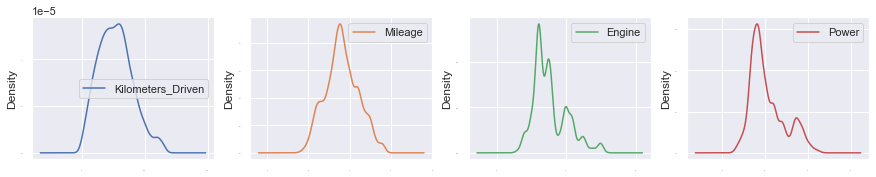

In [54]:
#Density Plot post outlier removal
refine_data_continous = refine_data1[['Kilometers_Driven','Mileage','Engine','Power']]
refine_data_continous.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

### Post-Outlier process : Box plot

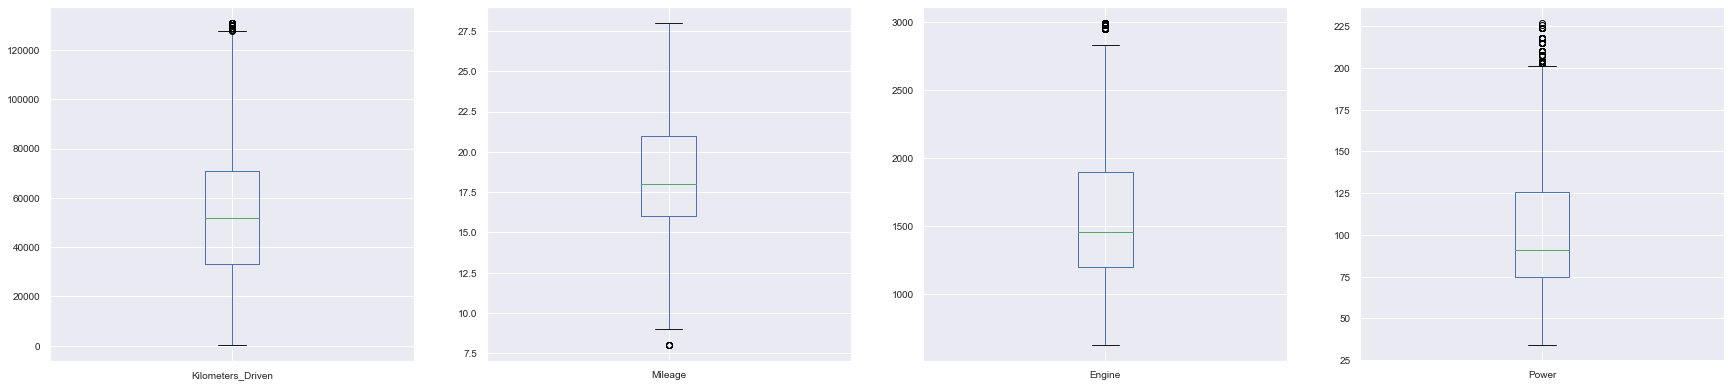

In [55]:
#Box_Plot post outlier removal
refine_data_continous.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=10, figsize = (30, 30))
plt.show()

### Post-Outlier process : Scatter plot

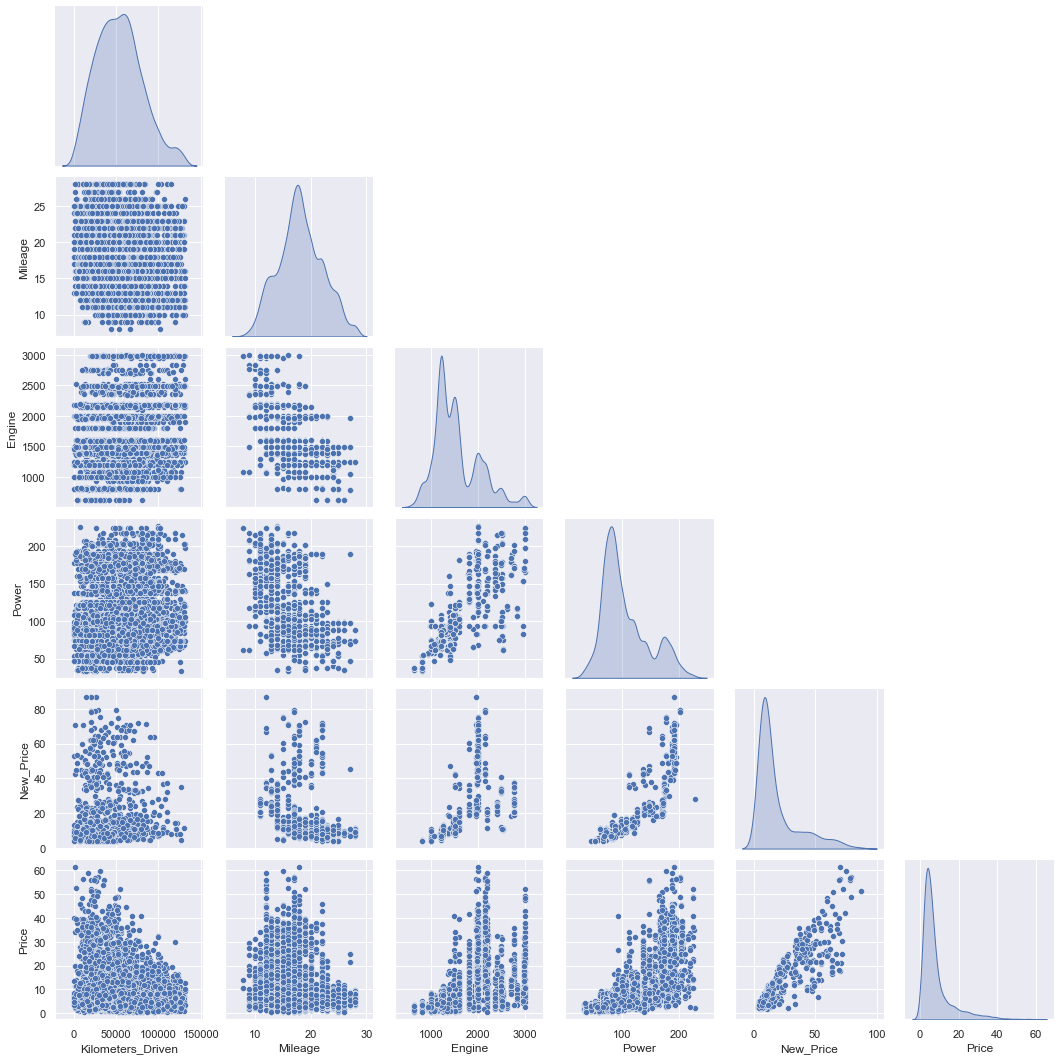

In [56]:
# Scatter plot matrix using seaborn library
refine_data_continous['New_Price']=refine_data1.New_Price
refine_data_continous['Price']=refine_data1.Price
sns.pairplot(refine_data_continous,corner=True,diag_kind='kde')
plt.show()

### Post-Outlier process : Heat map

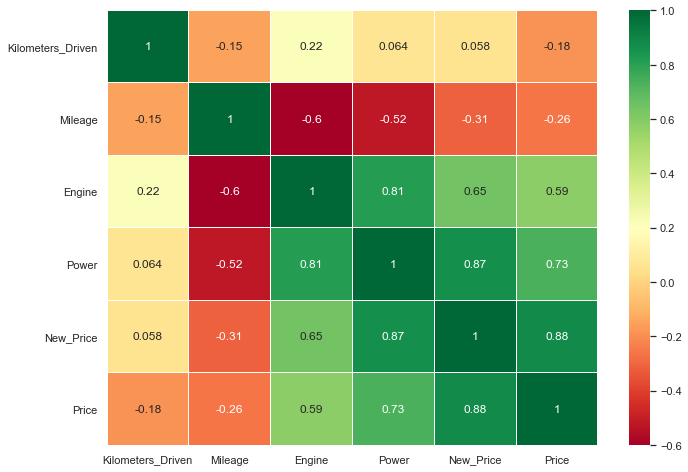

In [57]:
sns.heatmap(refine_data_continous.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

## Analysis post outlier treatment

- Density plot and box plot are treated well after outlier removal
- Heat map : Engine and Power are strongly corelated
- Heat map : After post outlier process , engine and power are moderately corelated with Price
- Stats on refined dataset is shown below

In [58]:
refine_data1.describe()

,S.No.,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
count,6694.00,6694.00,6694.00,6694.00,6694.00,6694.00,949.00,5553.00
mean,3626.57,53731.09,18.16,1536.58,105.21,5.25,18.73,8.18
std,2093.14,26979.02,3.95,485.54,40.23,0.74,17.32,8.12
min,0.00,171.00,8.00,624.00,34.00,2.00,3.91,0.44
25%,1816.25,33281.00,16.00,1197.00,75.00,5.00,7.77,3.45
50%,3630.50,52001.00,18.00,1461.00,91.00,5.00,11.26,5.50
75%,5437.75,70989.25,21.00,1896.00,126.00,5.00,22.74,8.99
max,7252.00,131000.00,28.00,2997.00,227.00,10.00,86.97,61.25


# Split dataset into train and test

## Define dependent variable

In [59]:
# Filter out NaN data from refine dataframe
refine_data1 = refine_data1[refine_data1['Price'].notna()]

# Independent variables : Remove Price (target) , Name & New_Price (for too many Nulls )
ind_vars = refine_data1.drop(["Price"], axis=1)
ind_vars = ind_vars.drop(["Name"], axis=1)
ind_vars = ind_vars.drop(["S.No."], axis=1)
ind_vars = ind_vars.drop(["New_Price"], axis=1)
ind_vars = ind_vars.drop(["Owner_Type"], axis=1)
ind_vars = ind_vars.drop(["Kilometers_Driven"], axis=1)

dep_var = refine_data1[["Price"]]

## Creating dummy variables

In [60]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)


In [61]:
#Check if we have any nulls in independent variables
ind_vars_num.isnull().sum()

Mileage               0
Engine                0
Power                 0
Seats                 0
Location_Bangalore    0
                     ..
brand_Skoda           0
brand_Tata            0
brand_Toyota          0
brand_Volkswagen      0
brand_Volvo           0
Length: 61, dtype: int64

In [62]:
# Split the dataframe into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [63]:
print("Number of rows in train data =", x_train.shape)
print("Number of rows in test data =", x_test.shape)

Number of rows in train data = (3887, 61)
Number of rows in test data = (1666, 61)


# Model Building, Performance & Evaluation

## Load all necessary packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Build Linear Model for prediction

In [65]:
# To build linear model for prediction
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Get Coefficient dataframe

In [66]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-0.04309
Engine,0.00025
Power,0.06697
Seats,0.45937
Location_Bangalore,1.76048
Location_Chennai,0.26631
Location_Coimbatore,1.38777
Location_Delhi,-0.35540
Location_Hyderabad,1.27836
Location_Jaipur,0.33637


## Coefficient interpretations

- Intercept is +4.17 which is a positive slope.
    - A positive slope means that two variables are positively related—that is, when x increases, so does y 
      and when x decreases, y also decreases.

- Coefficients of Power , Seats, Engine , Year, most of locations,Fuel type (Diesel specifically) are positive
    - Increase in these will lead to an increase in the price
    
- We observe as year increases , price will increase accordingly. Cars purchased in recent year will cost more than the cars purchased earlier than 2010 

- Car price increases in certain location like Bangalore , Coimbatore , Hyderabad and Jaipur. Whereas , for a few location, car price might decrease in location like Kolkata , Mumbai
 
- Coefficients of Owner types,  a few locations (Kochi,Kokata,Mumbai),Fuel type (LPG,Petrol) are negative
    - Increase in these will lead to a decrease in the price

## Model Performance RMSE, MAE, and  𝑅2 
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate adjusted $R^2$.
* We will create a function that will print out all the above metrics in one go.

**MAE**
- The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset

**RMSE**
- Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

**R^2**
- The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

**Adjusted R^2**
- Adjusted R squared is a modified version of R square, and it is adjusted for the number of independent variables in the model, and it will always be less than or equal to R².In the formula below n is the number of observations in the data and k is the number of the independent variables in the data.

In [67]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [68]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

     RMSE     MAE     R^2  Adjusted R^2
0 3.32323 2.07630 0.83292       0.83026


Test Performance

     RMSE     MAE     R^2  Adjusted R^2
0 3.61625 2.18943 0.80004       0.79244


## Model Observations
* The train and test  𝑅2  are 0.83 and 0.79, indicating that the model explains 83.1% and 79.1% of the total variation in the train and test sets respectively. Also, both scores are comparable.

* RMSE values on the train and test sets are also comparable.

* This shows that the model is not overfitting.

* MAE indicates that our current model is able to predict anime ratings within a mean error of 2.1 on the test set.

# Conclusion

- A predictive model is built that can be used to predict car price with an 𝑅2 of 0.83 on the training set.
- This model can predict the car price with mean error of 2.1 on the test set.

- Intercept is +4.17 which is a positive slope.
    - A positive slope means that two variables are positively related—that is, when x increases, so does y 
      and when x decreases, y also decreases.

- Coefficients of Power , Seats, Engine , Year, most of locations,Fuel type (Diesel specifically) are positive
    - Increase in these will lead to an increase in the price
    
- We observe as year increases , price will increase accordingly. Cars purchased in recent year will cost more than the cars purchased earlier than 2010 

- Car price increases in certain location like Bangalore , Coimbatore , Hyderabad and Jaipur. Whereas , for a few location, car price might decrease in location like Kolkata , Mumbai
 
- Coefficients of Owner types,  a few locations (Kochi,Kokata,Mumbai),Fuel type (LPG,Petrol) are negative
    - Increase in these will lead to a decrease in the price